In [8]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score , GridSearchCV



import os

In [9]:
Data = pd.read_csv("./data/CAR_DETAILS.csv")

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


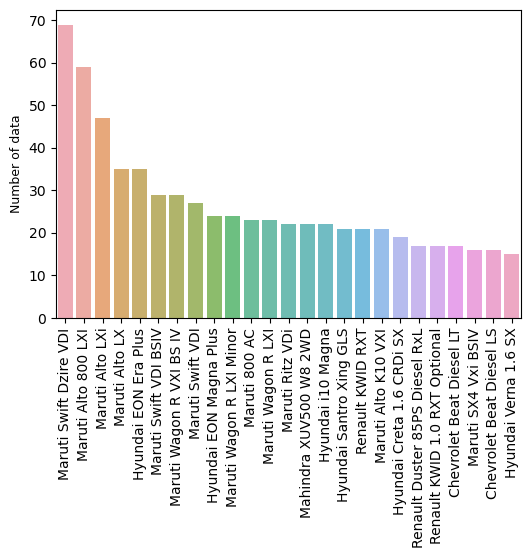

In [13]:
## name of vehicle
cnt_pro = Data["name"].value_counts() [:25]
plt.figure(figsize = (6,4))
sns.barplot(cnt_pro.index , cnt_pro.values, alpha=0.8)
plt.ylabel("Number of data", fontsize=9)
plt.xticks(rotation=90)
plt.show() ;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


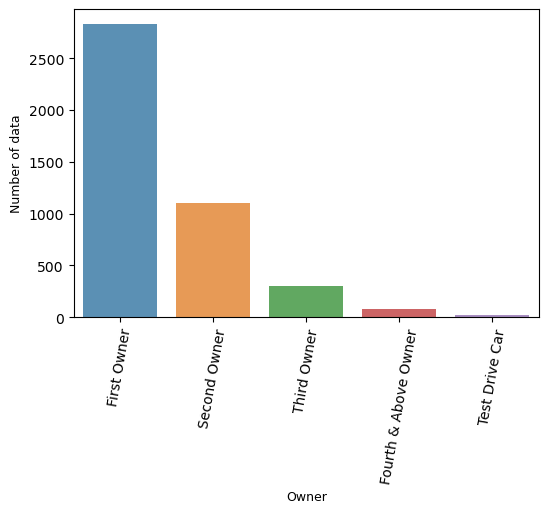

In [14]:
## owner
cnt_pro = Data["owner"].value_counts()
plt.figure(figsize = (6,4))
sns.barplot(cnt_pro.index , cnt_pro.values, alpha=0.8)
plt.ylabel("Number of data", fontsize=9)
plt.xlabel("Owner", fontsize=9)
plt.xticks(rotation=80)
plt.show() ;

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


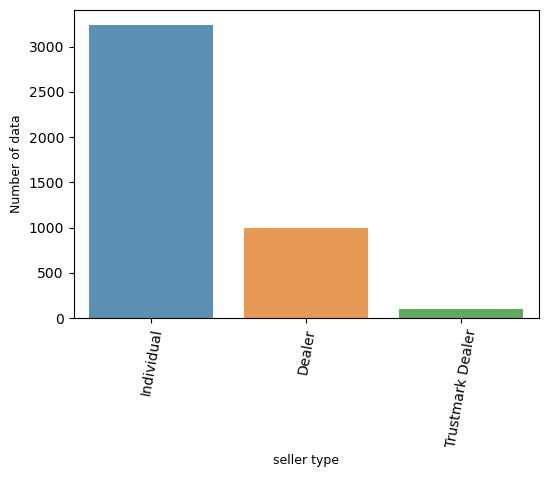

In [15]:
# Seller_type
cnt_pro = Data["seller_type"].value_counts()
plt.figure(figsize = (6,4))
sns.barplot(cnt_pro.index , cnt_pro.values, alpha=0.8)
plt.ylabel("Number of data", fontsize=9)
plt.xlabel("seller type", fontsize=9)
plt.xticks(rotation=80)
plt.show() ;

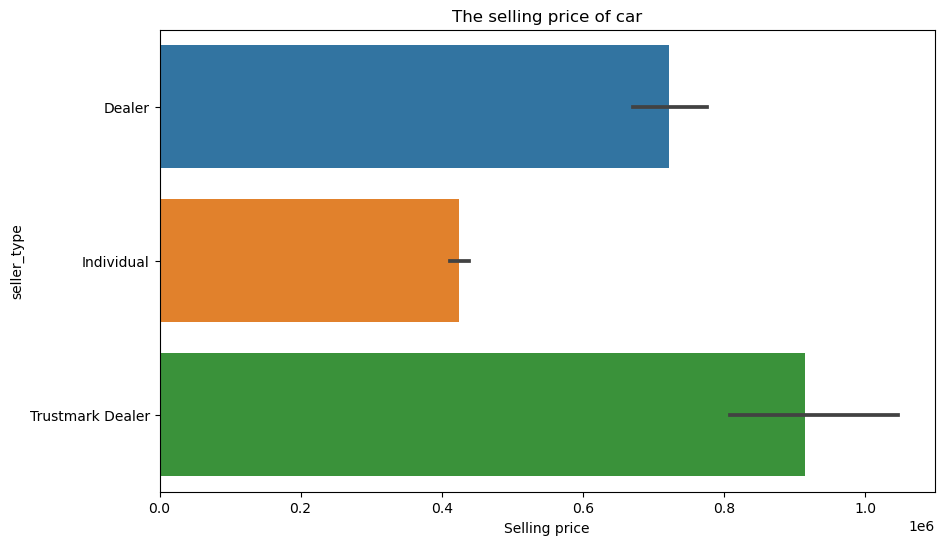

In [19]:
## the selling price of a vehicle


top_sell = Data.sort_values(by="selling_price" , ascending=False)
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_sell.seller_type , x=top_sell.selling_price)

plt.xticks()
plt.xlabel("Selling price")
plt.ylabel("seller_type")
plt.title("The selling price of car")
plt.show()

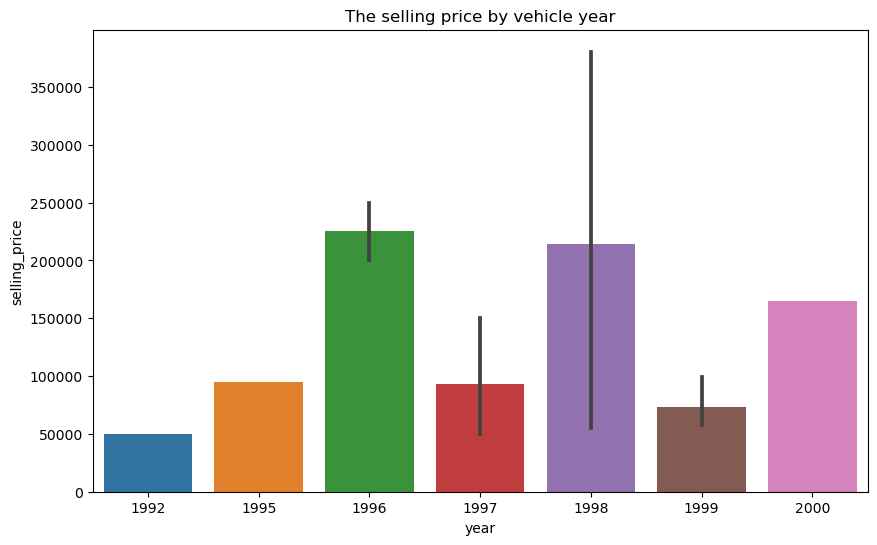

In [20]:
## THe selling price by vehicle year
top_sell = Data.sort_values(by='year', ascending=True)[:30]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_sell.selling_price, x=top_sell.year)
plt.xticks()
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('The selling price by vehicle year')
plt.show()

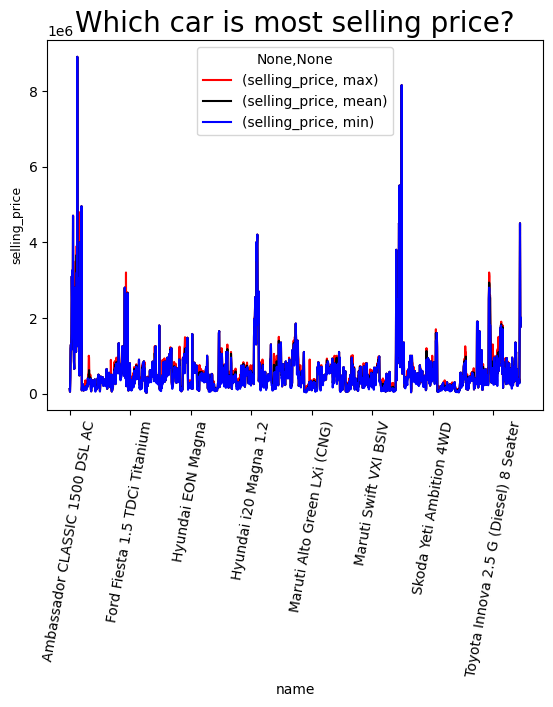

History's Best Selling Vehicles


,name,selling_price
3912,Ambassador CLASSIC 1500 DSL AC,120000
2878,Ambassador Classic 2000 Dsz,50000
3465,Ambassador Grand 1800 ISZ MPFI PW CL,430000
3458,Audi A4 1.8 TFSI,1200000
3094,Audi A4 2.0 TDI,1295000
99,Audi A4 2.0 TDI 177 Bhp Premium Plus,1150000
554,Audi A4 3.0 TDI Quattro,1580000
1065,Audi A4 30 TFSI Technology,3100000
1410,Audi A4 35 TDI Premium,2300000
1479,Audi A4 35 TDI Premium Plus,3256000


In [21]:
# here we are comparing the selling_price with name (vehicle)
# first group the name and get max,min and avg selling price of the vehicle
display(Data[["name","selling_price",]].groupby(["name"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Blues"))
# here we are ploting these values using lineplot
Data[["name","selling_price",]].groupby(["name"]).agg(["max",'mean',"min"]).plot(kind="line",color =["red","black","blue"])
plt.title("Which car is most selling price?", fontsize=20)
#plt.xticks(np.arange(17),['Maruti Swift Dzire VDI','Maruti Alto 800 LXI','Maruti Alto LXi','Hyundai EON Era Plus','Maruti Alto LX'],rotation=90,fontsize=15)
plt.ylabel("selling_price",fontsize=9) 
plt.xticks(rotation=80)
#plt.xlabel(" ")
plt.show()
print("History's Best Selling Vehicles")
display(Data.loc[Data.groupby(Data["name"])["selling_price"].idxmax()][["name",
                                                                  "selling_price"]].style.background_gradient(cmap="copper"))

## Time series selling price vehicles

time series selling price cars


,,selling_price
name,year,
BMW X5 xDrive 30d xLine,2019,54450000
Mercedes-Benz C-Class Progressive C 220d,2018,41800000
Toyota Fortuner 4x2 AT,2017,31195000
Audi A4 3.0 TDI Quattro,2013,18960000
Audi A6 2.0 TDI Premium Plus,2013,14300000
Maruti Swift Dzire VDI,2017,10893000
Hyundai Creta 1.6 CRDi SX,2016,10178999
Hyundai Verna 1.6 VTVT SX,2015,9120000
Maruti S-Cross Zeta DDiS 200 SH,2015,9000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


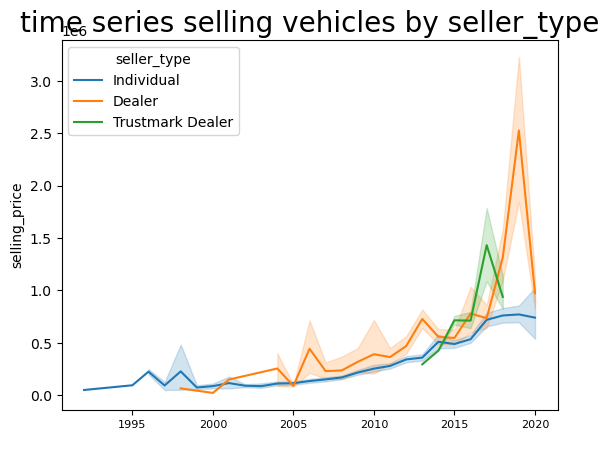

In [24]:
Data["year"] = Data["year"].astype("int")
print("time series selling price cars")
display(Data[["year","name","selling_price"]].groupby(["name","year"]).agg("sum").sort_values(by="selling_price", ascending=False).head(10).style.background_gradient(cmap="Greens"))

sns.lineplot(Data["year"], Data["selling_price"], hue=Data["seller_type"])
plt.title("time series selling vehicles by seller_type",fontsize=20)
plt.xticks(fontsize=8)
plt.xlabel(" ")
plt.show()


### so if u want to buy a car what points or things u need to know about ?
1. type of car,
2. year
3. transmission
4. km_driven
5. fuel
6. seller type
7. selling price

#### So as i said when u buy a vehicle from dealer and truetmark dealer it has higher seeling price than selling price than sellf by individual.

In [28]:
display(Data[Data["owner"]=="First Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="spring"))

display(Data[Data["owner"]=="Second Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="spring"))

display(Data[Data["owner"]=="Third Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="spring"))


display(Data[Data["owner"]=="Fourth & Above Owner"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="spring"))

display(Data[Data["owner"]=="Test Drive Car"][["name","transmission","year","km_driven","fuel","seller_type",
                                       "selling_price"]].sort_values(by="selling_price", ascending= False).head(5).style.background_gradient(cmap="spring"))


,name,transmission,year,km_driven,fuel,seller_type,selling_price
3872,Audi RS7 2015-2019 Sportback Performance,Automatic,2016,13000,Petrol,Dealer,8900000
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,Automatic,2017,6500,Diesel,Dealer,8150000
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,Automatic,2016,77350,Diesel,Dealer,5500000
919,BMW X5 xDrive 30d xLine,Automatic,2019,30000,Diesel,Dealer,4950000
593,BMW X5 xDrive 30d xLine,Automatic,2019,30000,Diesel,Dealer,4950000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,Automatic,2014,100000,Diesel,Individual,4400000
2178,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,Automatic,2014,100000,Diesel,Individual,4400000
163,Jaguar XJ 5.0 L V8 Supercharged,Automatic,2010,40000,Petrol,Individual,2550000
4224,Toyota Fortuner 2.7 2WD AT,Automatic,2016,70000,Petrol,Individual,2500000
836,Mercedes-Benz M-Class ML 350 CDI,Automatic,2014,79500,Diesel,Individual,2500000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
1410,Audi A4 35 TDI Premium,Automatic,2015,35000,Diesel,Individual,2300000
3320,Volvo XC60 D3 Kinetic,Automatic,2012,115992,Diesel,Dealer,1750000
44,Audi Q7 35 TDI Quattro Premium,Automatic,2009,78000,Diesel,Dealer,1250000
4049,Hyundai Creta 1.6 CRDi SX Plus,Manual,2016,60000,Diesel,Individual,1249000
1057,Skoda Octavia Elegance 2.0 TDI AT,Automatic,2014,135000,Diesel,Individual,1200000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
236,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Manual,2010,163000,Diesel,Individual,700000
957,Mahindra Scorpio M2DI,Manual,2012,110000,Diesel,Individual,600000
818,Maruti Ertiga ZDI,Manual,2012,120000,Diesel,Individual,480000
2955,Toyota Innova 2.5 G4 Diesel 7-seater,Manual,2007,223000,Diesel,Individual,440000
986,Ford Endeavour Hurricane Limited Edition,Automatic,2007,110000,Diesel,Individual,400000


,name,transmission,year,km_driven,fuel,seller_type,selling_price
2359,Volkswagen Vento 1.5 TDI Highline BSIV,Manual,2019,5400,Diesel,Dealer,1350000
1778,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,Manual,2020,1010,Diesel,Dealer,1334000
1780,Ford Ecosport Thunder Edition Diesel,Manual,2020,1010,Diesel,Dealer,1331000
3615,Honda City i-VTEC CVT ZX,Automatic,2018,13000,Petrol,Dealer,1165000
1775,Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV,Manual,2020,1010,Petrol,Dealer,1119000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'seller_type : km_driven comparison')

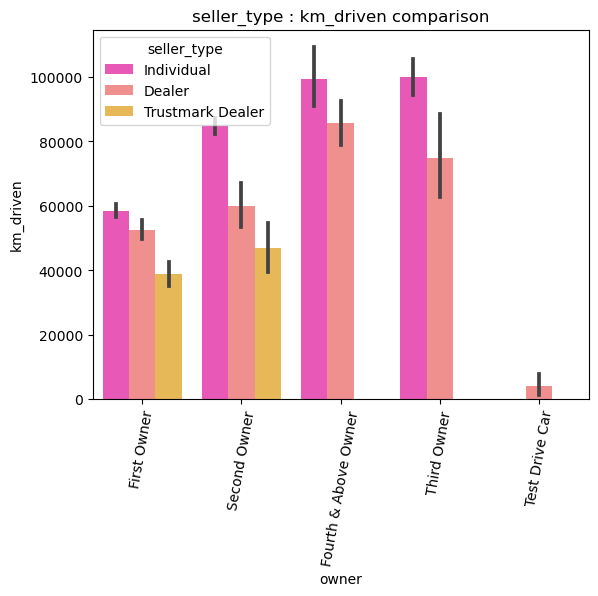

In [29]:
sns.barplot(Data["owner"], Data["km_driven"], hue= Data["seller_type"], palette="spring")

plt.xticks(rotation=80)
plt.title("seller_type : km_driven comparison")

### native recommendation based on the the fuek type and the mechanism of runnig

In [40]:
def recommend_vehicles(x):
    y = Data[["fuel","name","km_driven","transmission","selling_price"]][Data["fuel"] == x]
    y = y.sort_values(by="selling_price", ascending=False)


    return y.head(1)

In [43]:
print("for u we recommend this model (Diesel) : ", recommend_vehicles("Diesel")["name"].iloc[0])

for u we recommend this model :  Mercedes-Benz S-Class S 350d Connoisseurs Edition


In [44]:
print("for u we recommend this model : (Petrol) ", recommend_vehicles("Petrol")["name"].iloc[0])

for u we recommend this model : (Petrol)  Audi RS7 2015-2019 Sportback Performance


In [45]:
print("for u we recommend this model : (CNG) ", recommend_vehicles("CNG")["name"].iloc[0])

for u we recommend this model : (CNG)  Maruti Ertiga VXI CNG


In [46]:
print("for u we recommend this model : (LPG) ", recommend_vehicles("LPG")["name"].iloc[0])

for u we recommend this model : (LPG)  Hyundai i10 Magna LPG


In [47]:
print("for u we recommend this model : (fully electric) ", recommend_vehicles("Electric")["name"].iloc[0])

for u we recommend this model : (fully electric)  Toyota Camry Hybrid


### Recommending vehicles baed on the owner (first , second , ...)

In [51]:
def recommend_vehicles_2(x):
    y = Data[["owner","name","km_driven","transmission","selling_price"]][Data["owner"] == x]
    y = y.sort_values(by="selling_price", ascending=False)


    return y.head(5)

In [57]:
print("for u we recommend these",len(recommend_vehicles_2("First Owner"))," models : \n", recommend_vehicles_2("First Owner")["name"].iloc[:])

for u we recommend these 5  models : 
 3872             Audi RS7 2015-2019 Sportback Performance
89      Mercedes-Benz S-Class S 350d Connoisseurs Edition
3969              Mercedes-Benz GLS 2016-2020 350d 4MATIC
919                               BMW X5 xDrive 30d xLine
593                               BMW X5 xDrive 30d xLine
Name: name, dtype: object


In [58]:
print("for u we recommend these",len(recommend_vehicles_2("Second Owner"))," models : \n", recommend_vehicles_2("Second Owner")["name"].iloc[:])


for u we recommend these 5  models : 
 539     Mercedes-Benz GL-Class 350 CDI Blue Efficiency
2178    Mercedes-Benz GL-Class 350 CDI Blue Efficiency
163                    Jaguar XJ 5.0 L V8 Supercharged
4224                        Toyota Fortuner 2.7 2WD AT
836                   Mercedes-Benz M-Class ML 350 CDI
Name: name, dtype: object


In [59]:
print("for u we recommend these",len(recommend_vehicles_2("Third Owner"))," models : \n", recommend_vehicles_2("Third Owner")["name"].iloc[:])


for u we recommend these 5  models : 
 1410               Audi A4 35 TDI Premium
3320                Volvo XC60 D3 Kinetic
44         Audi Q7 35 TDI Quattro Premium
4049       Hyundai Creta 1.6 CRDi SX Plus
1057    Skoda Octavia Elegance 2.0 TDI AT
Name: name, dtype: object


In [60]:
print("for u we recommend these",len(recommend_vehicles_2("Fourth & Above Owner"))," models : \n", recommend_vehicles_2("First Owner")["name"].iloc[:])


for u we recommend these 5  models : 
 3872             Audi RS7 2015-2019 Sportback Performance
89      Mercedes-Benz S-Class S 350d Connoisseurs Edition
3969              Mercedes-Benz GLS 2016-2020 350d 4MATIC
919                               BMW X5 xDrive 30d xLine
593                               BMW X5 xDrive 30d xLine
Name: name, dtype: object


In [61]:

print("for u we recommend these",len(recommend_vehicles_2("Test Drive Car"))," models : \n", recommend_vehicles_2("Test Drive Car")["name"].iloc[:])

for u we recommend these 5  models : 
 2359          Volkswagen Vento 1.5 TDI Highline BSIV
1778       Ford EcoSport 1.5 TDCi Titanium Plus BSIV
1780            Ford Ecosport Thunder Edition Diesel
3615                        Honda City i-VTEC CVT ZX
1775    Ford EcoSport 1.5 Ti VCT MT Titanium BE BSIV
Name: name, dtype: object


## Recommend vehicles based on seller type

In [62]:
def recommend_vehicles_3(x):
    y = Data[["seller_type","name","km_driven","transmission","selling_price"]][Data["seller_type"] == x]
    y = y.sort_values(by="selling_price", ascending=False)


    return y.head(1)

In [65]:
print("for u we recommend these",len(recommend_vehicles_3("Individual"))," model(s) : ", recommend_vehicles_3("Individual")["name"].iloc[0])

for u we recommend these 1  model(s) :  BMW 5 Series 520d Luxury Line
